In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_table("/Volumes/Macintosh HD/Data/glove.6B/glove.6B.50d.txt", delimiter=" ", header=None, index_col=0, quoting=3)

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,,,,,,,,,,,,,,,,,,,,,
the,0.418000,0.249680,-0.41242,0.12170,0.34527,-0.044457,-0.49688,-0.17862,-0.00066,-0.656600,...,-0.298710,-0.157490,-0.347580,-0.045637,-0.44251,0.187850,0.002785,-0.184110,-0.115140,-0.78581
",",0.013441,0.236820,-0.16899,0.40951,0.63812,0.477090,-0.42852,-0.55641,-0.36400,-0.239380,...,-0.080262,0.630030,0.321110,-0.467650,0.22786,0.360340,-0.378180,-0.566570,0.044691,0.30392
.,0.151640,0.301770,-0.16763,0.17684,0.31719,0.339730,-0.43478,-0.31086,-0.44999,-0.294860,...,-0.000064,0.068987,0.087939,-0.102850,-0.13931,0.223140,-0.080803,-0.356520,0.016413,0.10216
of,0.708530,0.570880,-0.47160,0.18048,0.54449,0.726030,0.18157,-0.52393,0.10381,-0.175660,...,-0.347270,0.284830,0.075693,-0.062178,-0.38988,0.229020,-0.216170,-0.225620,-0.093918,-0.80375
to,0.680470,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,...,-0.094375,0.018324,0.210480,-0.030880,-0.19722,0.082279,-0.094340,-0.073297,-0.064699,-0.26044


In [5]:
df.loc["julia"]

1     0.356420
2     1.183400
3    -0.103870
4     0.222150
5     0.141760
6     1.090300
7    -0.214050
8     0.256160
9    -0.607690
10   -0.387420
11   -0.439190
12    0.903770
13   -0.444130
14    0.343960
15    0.608790
16   -0.148300
17   -0.003953
18   -0.428400
19    0.318940
20    0.215500
21    0.225790
22    0.734510
23    0.301400
24    0.623730
25    1.028200
26   -0.731920
27    0.286400
28   -0.350820
29   -0.499460
30   -0.290590
31    0.352810
32    0.398140
33    0.268610
34   -0.429490
35   -0.295730
36   -0.395670
37   -0.200520
38    0.744380
39    0.373960
40   -0.600440
41    0.342190
42    0.969090
43    0.538070
44   -1.321000
45   -0.024624
46    0.662180
47   -0.302280
48   -1.704600
49    0.634820
50    0.935580
Name: julia, dtype: float64

In [4]:
words = set(df.index)

In [5]:
"daniel" in words

True

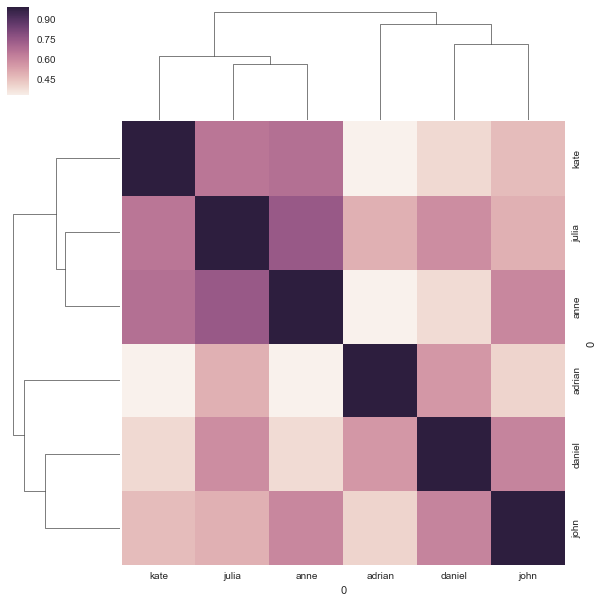

In [6]:
sns.clustermap(df.loc[["daniel", "adrian", "john", "kate", "julia", "anne"]].transpose().corr())

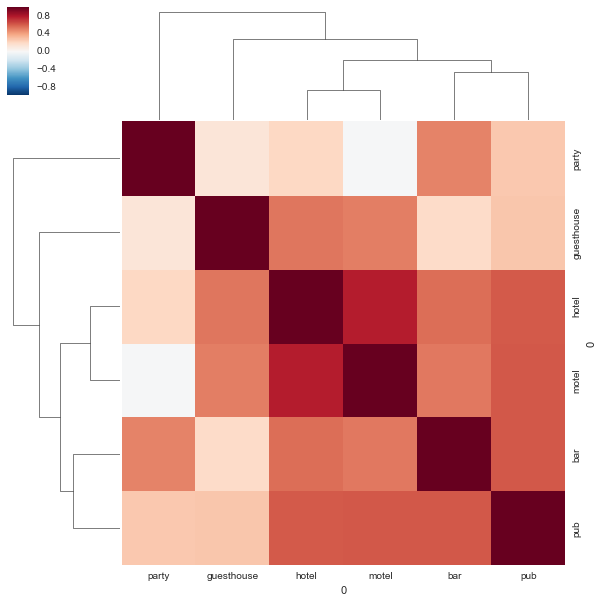

In [7]:
sns.clustermap(df.loc[["hotel", "motel", "guesthouse", "bar", "pub", "party"]].transpose().corr())

In [8]:
np.dot(df.loc["kate"],  df.loc["he"] - df.loc["she"])

-6.5869068840070009

In [9]:
np.dot(df.loc["john"],  df.loc["he"] - df.loc["she"])

2.5265921501259196

In [10]:
names = ["kate", "catherine", "john", "mark", "peter", "anna", "julia", "jacob", "jake",
         "richard", "ted", "theodore", "sue", "susanne", "suzanne", "susan", "mary",
         "leo", "leonard", "alexander", "alexandra", "alex", "sasha"]
all([name in words for name in names])

True

In [11]:
gender = df.loc["he"] - df.loc["she"]

In [12]:
df.loc[names].dot(gender).sort_values()

0
anna        -7.344199
kate        -6.586907
susan       -5.699029
julia       -5.126295
mary        -4.743954
sasha       -4.371697
catherine   -4.177077
alexandra   -4.109371
suzanne     -3.833959
sue         -2.976699
susanne     -2.352316
jake        -1.061410
alex        -0.501445
ted         -0.465928
leonard      0.742049
peter        0.865114
jacob        0.987405
richard      1.340372
leo          2.063482
mark         2.316420
alexander    2.471270
theodore     2.525033
john         2.526592
dtype: float64

In [13]:
diminutive = df.loc["kate"] - df.loc["catherine"]

In [14]:
proj = pd.DataFrame([gender, diminutive], index=["gender", "diminutive"]).transpose()

In [15]:
df_plot = df.loc[names].dot(proj).sort_values(by="diminutive")
df_plot

,gender,diminutive
0,,
catherine,-4.177077,-7.004076
alexander,2.471270,-4.733500
alexandra,-4.109371,-4.541007
theodore,2.525033,-3.765326
leo,2.063482,-3.650150
mary,-4.743954,-3.394519
peter,0.865114,-2.686588
suzanne,-3.833959,-2.250602
john,2.526592,-2.064688


In [16]:
df_plot["name"] = df_plot.index

In [17]:
%load_ext rpy2.ipython

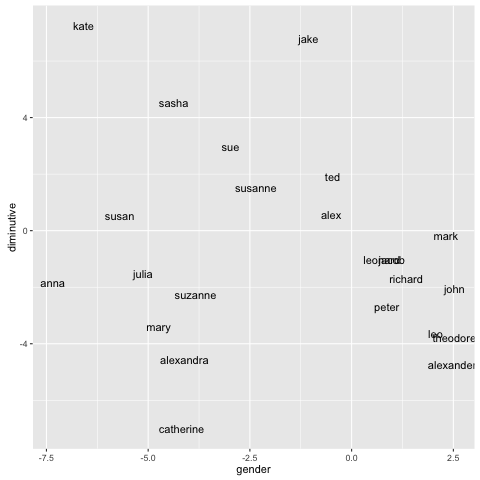

In [18]:
%%R -i df_plot
library(ggplot2)

ggplot(df_plot, aes(gender, diminutive, label=name)) +
  geom_text()

In [14]:
lens = (df**2).sum(axis=1)
dfn = df.div(np.sqrt(lens), axis='index')

In [22]:
dfn.dot(dfn.loc["jason"]).sort_values(ascending=False).head(20)

0
jason       1.000000
derek       0.849572
matt        0.816070
sean        0.809574
josh        0.803905
ryan        0.797081
anderson    0.777433
shawn       0.774331
curtis      0.774186
crosby      0.769591
kidd        0.764204
brandon     0.758109
brad        0.757077
damon       0.750403
freeman     0.750331
kelly       0.747070
jay         0.746571
kevin       0.743553
aaron       0.742430
tim         0.742152
dtype: float64